Fan Speed: 55.95238095238095


c:\Users\sruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


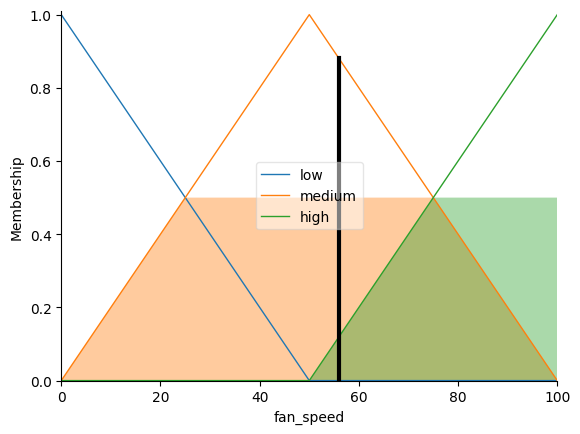

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership functions
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
temperature.automf(names=['cold', 'warm', 'hot'])

# Custom membership functions can be built interactively with a familiar Pythonic API
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Rule creation
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

# Control system creation and simulation
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_simulation = ctrl.ControlSystemSimulation(fan_speed_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Let's say the current room temperature is 30 degrees Celsius
fan_speed_simulation.input['temperature'] = 30

# Crunch the numbers
fan_speed_simulation.compute()

print(f"Fan Speed: {fan_speed_simulation.output['fan_speed']}")
fan_speed.view(sim=fan_speed_simulation)

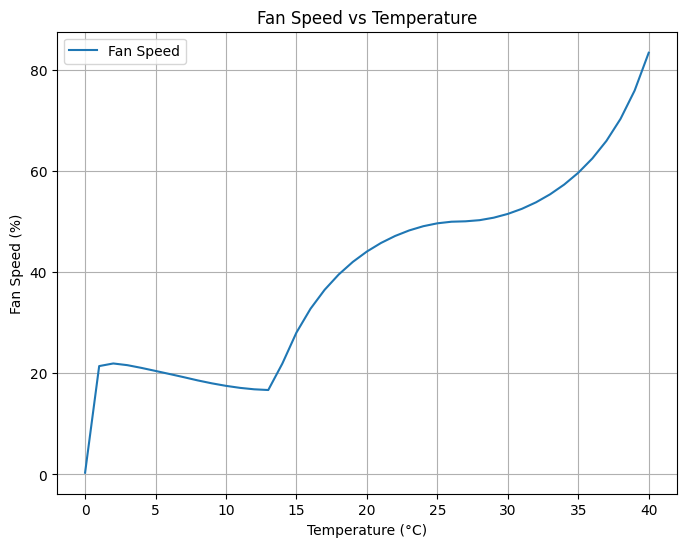

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership functions
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
temperature.automf(names=['very_cold', 'cold', 'warm', 'hot'])

# Custom membership functions for fan speed
fan_speed['off'] = fuzz.trimf(fan_speed.universe, [0, 0, 0])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Rule creation
rule1 = ctrl.Rule(temperature['very_cold'], fan_speed['off'])
rule2 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['hot'], fan_speed['high'])

# Control system creation and simulation
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fan_speed_simulation = ctrl.ControlSystemSimulation(fan_speed_ctrl)

# Set up the temperature range for plotting
temperature_range = np.arange(0, 41, 1)

# Compute fan speed for each temperature and store the results for plotting
fan_speed_values = []
for temp in temperature_range:
    fan_speed_simulation.input['temperature'] = temp
    fan_speed_simulation.compute()
    fan_speed_values.append(fan_speed_simulation.output['fan_speed'])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temperature_range, fan_speed_values, label='Fan Speed')
plt.title('Fan Speed vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fan Speed (%)')
plt.legend()
plt.grid(True)
plt.show()

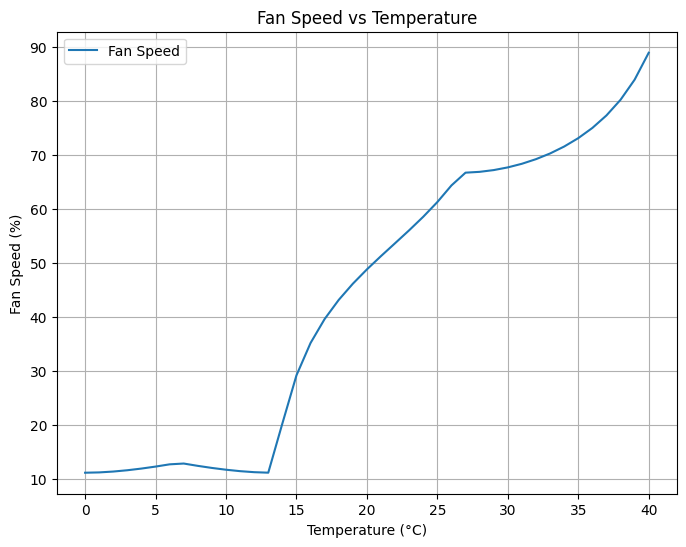

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define universe variables and membership functions
temp_range = np.arange(0, 41, 1)
speed_range = np.arange(0, 101, 1)

temperature = ctrl.Antecedent(temp_range, 'temperature')
fan_speed = ctrl.Consequent(speed_range, 'fan_speed')

# Define membership functions
temperature.automf(names=['very_cold', 'cold', 'warm', 'hot'])
fan_speed.automf(names=['off', 'low', 'medium', 'high'])

# Define rules
rules = [
    ctrl.Rule(temperature['very_cold'], fan_speed['off']),
    ctrl.Rule(temperature['cold'], fan_speed['off']),
    ctrl.Rule(temperature['warm'], fan_speed['medium']),
    ctrl.Rule(temperature['hot'], fan_speed['high'])
]

# Create control system and simulation
fan_speed_ctrl = ctrl.ControlSystem(rules)
fan_speed_simulation = ctrl.ControlSystemSimulation(fan_speed_ctrl)

# Compute fan speed for each temperature
fan_speed_values = []
for temp in temp_range:
    fan_speed_simulation.input['temperature'] = temp
    fan_speed_simulation.compute()
    fan_speed_values.append(fan_speed_simulation.output['fan_speed'])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temp_range, fan_speed_values, label='Fan Speed')
plt.title('Fan Speed vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fan Speed (%)')
plt.legend()
plt.grid(True)
plt.show()


Steering Angle: 162.04 degrees


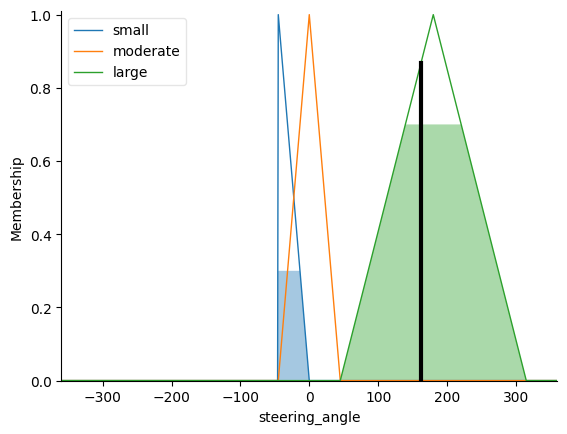

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe of discourse for each variable
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
speed = ctrl.Antecedent(np.arange(0, 201, 1), 'speed')
steering_angle = ctrl.Consequent(np.arange(-360, 361, 1), 'steering_angle')

# Populate the fuzzy membership functions
distance.automf(names=['near', 'medium', 'far'])
speed.automf(names=['slow', 'moderate', 'fast'])

# Custom membership functions for steering angle
steering_angle['small'] = fuzz.trimf(steering_angle.universe, [-45, -45, 0])
steering_angle['moderate'] = fuzz.trimf(steering_angle.universe, [-45, 0, 45])
steering_angle['large'] = fuzz.trimf(steering_angle.universe, [45, 180, 315])  # Adjusted for wider steering capability

# Define fuzzy rules
rule1 = ctrl.Rule(distance['near'] & speed['fast'], steering_angle['large'])
rule2 = ctrl.Rule(distance['near'] & speed['moderate'], steering_angle['moderate'])
rule3 = ctrl.Rule(distance['near'] & speed['slow'], steering_angle['small'])
rule4 = ctrl.Rule(distance['medium'] | distance['far'], steering_angle['small'])

# Create and simulate a fuzzy control system
steering_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
steering_simulation = ctrl.ControlSystemSimulation(steering_control)

# Input values for an example scenario
steering_simulation.input['distance'] = 15  # Very close to an obstacle
steering_simulation.input['speed'] = 800   # Very high speed

# Compute the decision
steering_simulation.compute()

# Display the output
print(f"Steering Angle: {steering_simulation.output['steering_angle']:.2f} degrees")

# Generate fuzzy set plots
# distance.view()
# speed.view()
steering_angle.view(sim=steering_simulation)

# Show the plots
plt.show()

Steering Angle: -2.17 degrees
Car Speed: 6.00 km/h


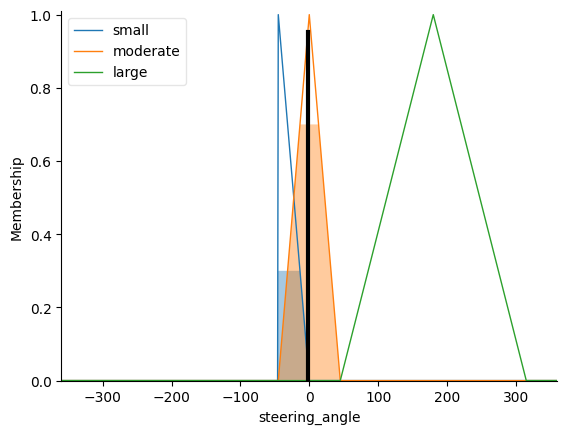

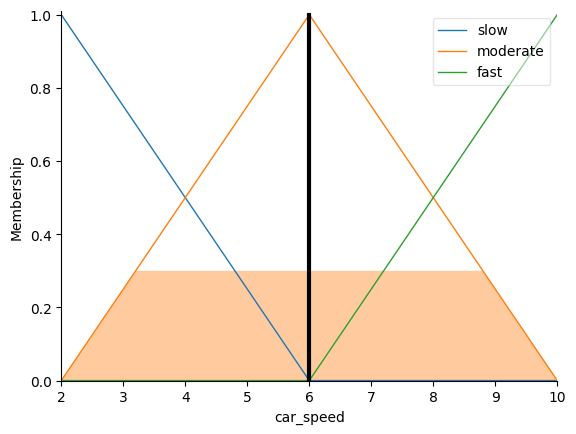

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe of discourse for each variable
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
speed = ctrl.Antecedent(np.arange(0, 201, 1), 'speed')
steering_angle = ctrl.Consequent(np.arange(-360, 361, 1), 'steering_angle')
car_speed = ctrl.Consequent(np.arange(2, 11, 1), 'car_speed')  # New variable for car speed

# Populate the fuzzy membership functions
distance.automf(names=['near', 'medium', 'far'])
speed.automf(names=['slow', 'moderate', 'fast'])
car_speed.automf(names=['slow', 'moderate', 'fast'])  # Membership functions for car speed

# Custom membership functions for steering angle
steering_angle['small'] = fuzz.trimf(steering_angle.universe, [-45, -45, 0])
steering_angle['moderate'] = fuzz.trimf(steering_angle.universe, [-45, 0, 45])
steering_angle['large'] = fuzz.trimf(steering_angle.universe, [45, 180, 315])  # Adjusted for wider steering capability

# Define fuzzy rules
rules = [
    ctrl.Rule(distance['near'] & speed['fast'], steering_angle['large']),
    ctrl.Rule(distance['near'] & speed['moderate'], steering_angle['moderate']),
    ctrl.Rule(distance['near'] & speed['slow'], steering_angle['small']),
    ctrl.Rule(distance['medium'] | distance['far'], steering_angle['small']),
    ctrl.Rule(distance['near'] & speed['fast'], car_speed['slow']),  # New rules for car speed
    ctrl.Rule(distance['medium'] & speed['moderate'], car_speed['moderate']),
    ctrl.Rule(distance['far'] & speed['slow'], car_speed['fast'])
]

# Create and simulate a fuzzy control system
car_control = ctrl.ControlSystem(rules)
car_simulation = ctrl.ControlSystemSimulation(car_control)

# Input values for an example scenario
car_simulation.input['distance'] = 15  # Very close to an obstacle
car_simulation.input['speed'] = 80   # Very high speed

# Compute the decision
car_simulation.compute()

# Display the output
print(f"Steering Angle: {car_simulation.output['steering_angle']:.2f} degrees")
print(f"Car Speed: {car_simulation.output['car_speed']:.2f} km/h")

# Generate fuzzy set plots
# distance.view()
# speed.view()
steering_angle.view(sim=car_simulation)
car_speed.view(sim=car_simulation)  # Plot for car speed

# Show the plots
plt.show()


Step 1: Distance = 150m, Speed = 75.00 km/h, Steering Angle = -30.33 degrees
Step 2: Distance = 150m, Speed = 70.00 km/h, Steering Angle = -30.33 degrees
Step 3: Distance = 150m, Speed = 65.00 km/h, Steering Angle = -30.33 degrees
Step 4: Distance = 150m, Speed = 60.00 km/h, Steering Angle = -30.33 degrees
Step 5: Distance = 150m, Speed = 55.00 km/h, Steering Angle = -30.33 degrees
Step 6: Distance = 150m, Speed = 50.00 km/h, Steering Angle = -30.33 degrees
Step 7: Distance = 150m, Speed = 45.00 km/h, Steering Angle = -30.33 degrees
Step 8: Distance = 150m, Speed = 40.00 km/h, Steering Angle = -30.33 degrees
Step 9: Distance = 150m, Speed = 35.00 km/h, Steering Angle = -30.33 degrees
Step 10: Distance = 150m, Speed = 30.00 km/h, Steering Angle = -30.33 degrees
Step 11: Distance = 150m, Speed = 25.00 km/h, Steering Angle = -30.33 degrees
Step 12: Distance = 150m, Speed = 20.00 km/h, Steering Angle = -30.33 degrees
Step 13: Distance = 150m, Speed = 15.00 km/h, Steering Angle = -30.33 deg

<Figure size 800x600 with 0 Axes>

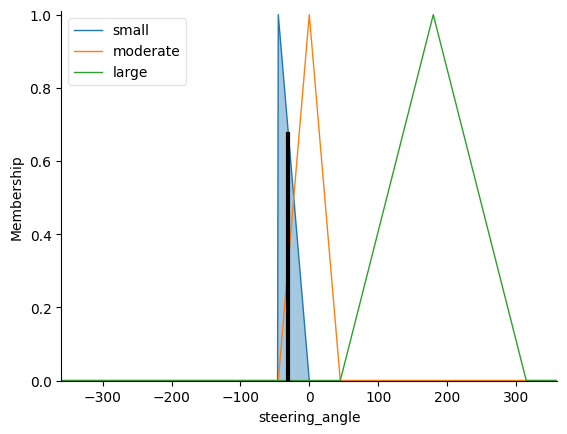

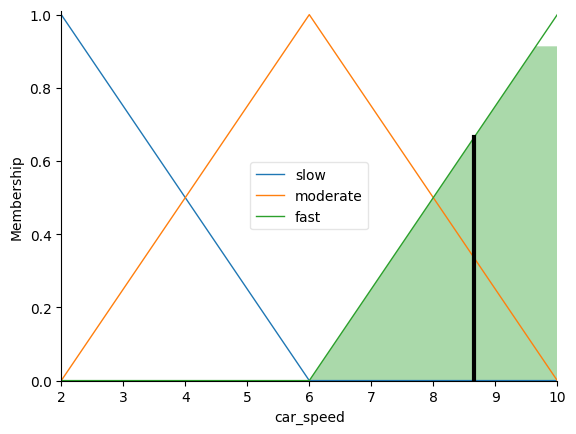

<Figure size 800x600 with 0 Axes>

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import time

# Define the universe of discourse for each variable
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')  # Distance in meters
speed = ctrl.Antecedent(np.arange(0, 201, 1), 'speed')  # Speed in km/h
steering_angle = ctrl.Consequent(np.arange(-360, 361, 1), 'steering_angle')
car_speed = ctrl.Consequent(np.arange(2, 11, 1), 'car_speed')  # Desired car speed

# Populate the fuzzy membership functions
distance.automf(names=['near', 'medium', 'far'])
speed.automf(names=['slow', 'moderate', 'fast'])
car_speed.automf(names=['slow', 'moderate', 'fast'])  # Membership functions for car speed

# Custom membership functions for steering angle
steering_angle['small'] = fuzz.trimf(steering_angle.universe, [-45, -45, 0])
steering_angle['moderate'] = fuzz.trimf(steering_angle.universe, [-45, 0, 45])
steering_angle['large'] = fuzz.trimf(steering_angle.universe, [45, 180, 315])  # Adjusted for wider steering capability

# Define fuzzy rules
rules = [
    ctrl.Rule(distance['near'] & speed['fast'], steering_angle['large']),
    ctrl.Rule(distance['near'] & speed['moderate'], steering_angle['moderate']),
    ctrl.Rule(distance['near'] & speed['slow'], steering_angle['small']),
    ctrl.Rule(distance['medium'] | distance['far'], steering_angle['small']),
    ctrl.Rule(distance['near'] & speed['fast'], car_speed['slow']),  # New rules for car speed
    ctrl.Rule(distance['near'] & speed['moderate'], car_speed['moderate']),
    ctrl.Rule(distance['medium'] & speed['slow'], car_speed['moderate']),
    ctrl.Rule(distance['far'] & (speed['slow'] | speed['moderate']), car_speed['fast']),
]

# Create and simulate a fuzzy control system
car_control = ctrl.ControlSystem(rules)
car_simulation = ctrl.ControlSystemSimulation(car_control)

# Initial speed
initial_speed = 80  # km/h

# Simulation parameters
dt = 0.1  # Time step in seconds
simulation_time = 10  # Total simulation time in seconds
time_steps = int(simulation_time / dt)

# Initialize car speed and distance (assuming constant distance for now)
car_speed_history = np.zeros(time_steps)
car_speed_history[0] = initial_speed

distance_val = 150  # meters (assuming constant distance for now)

# Simulate the fuzzy car control system over time
for i in range(1, time_steps):
  # Update car speed based on fuzzy control system output
  car_simulation.input['distance'] = distance_val
  car_simulation.input['speed'] = car_speed_history[i - 1]
  car_simulation.compute()
  desired_speed = car_simulation.output['car_speed']

  # Gradually decrease speed towards the desired speed
  car_speed_history[i] = max(desired_speed, car_speed_history[i - 1] - 5)  # Adjust speed reduction based on your needs

  # Print results (optional)
  print(f"Step {i}: Distance = {distance_val}m, Speed = {car_speed_history[i]:.2f} km/h, Steering Angle = {car_simulation.output['steering_angle']:.2f} degrees")

  # Simulate a small time delay (optional)
  time.sleep(dt)

# Generate fuzzy set plots (optional)
# distance.view()
# speed.view()
steering_angle.view(sim=car_simulation)
car_speed.view(sim=car_simulation)  # Plot for car speed

# Plot car speed vs time
plt.figure(figsize=(8, 6))